In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

In [110]:
df = pd.read_csv('fraud.csv')

In [111]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# 1) Exploratory Data Analysis 

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [113]:
df.isnull().sum()


step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [114]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


# Fraud Analysis

In [115]:
colors = ['#92d400', '#002776', '#00a1de','#000000','#955251','#B565A7','#009B77','#D65076']

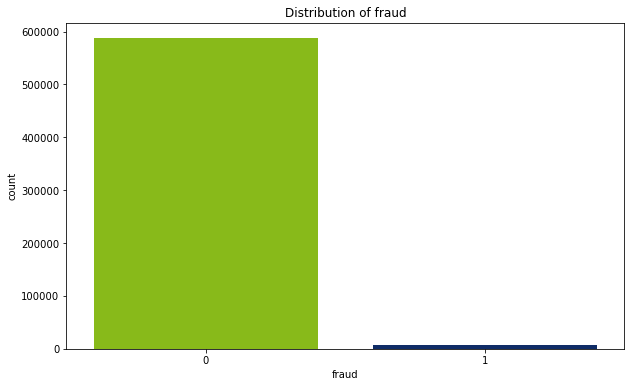

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fraud', data=df, palette=colors)
plt.title('Distribution of fraud')
plt.show()

In [117]:
fraud_counts = df['fraud'].value_counts()
percentage_non_fraudulent = (fraud_counts[0] / len(df)) * 100
percentage_non_fraudulent = round(percentage_non_fraudulent, 1)
percentage_non_fraudulent

98.8

In [118]:
fraudulent_data = df[df['fraud'] == 1]

# Gender Analysis

In [119]:
# This indicates that "U" represent individuals
df.loc[df['gender'] == "'U'", 'age'].unique()

array(["'1'", "'3'", "'2'"], dtype=object)

In [120]:
# This indicates that "E" does not represent individuals
df.loc[df['gender'] == "'E'", 'age'].unique()

array(["'U'"], dtype=object)

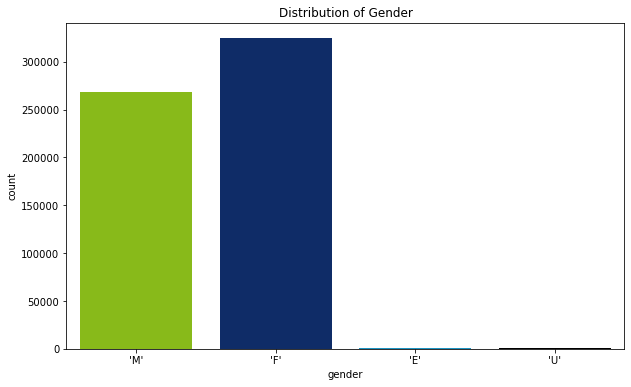

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, palette=colors)
plt.title('Distribution of Gender')
plt.show()

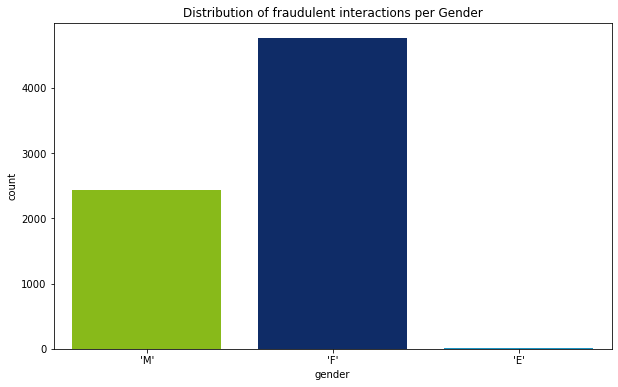

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=fraudulent_data, palette=colors)
plt.title('Distribution of fraudulent interactions per Gender')
plt.show()

# Age Analysis

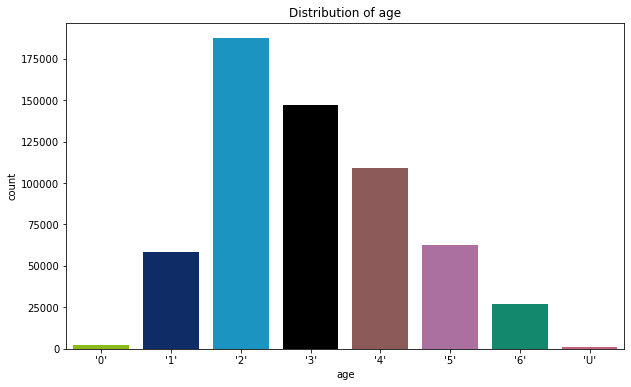

In [123]:
custom_order = ["'0'", "'1'", "'2'", "'3'", "'4'", "'5'", "'6'", "'U'"]
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, palette=colors, order= custom_order)
plt.title('Distribution of age')
plt.show()

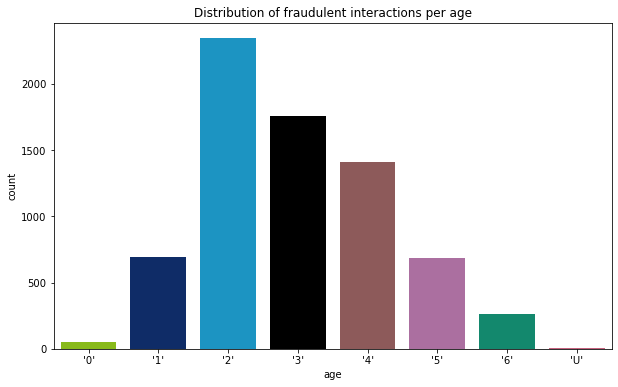

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=fraudulent_data, palette=colors, order= custom_order)
plt.title('Distribution of fraudulent interactions per age')
plt.show()

In [125]:
gender_age_crosstab = pd.crosstab(df['gender'], df['age'])
gender_age_crosstab

age,'0','1','2','3','4','5','6','U'
gender,,,,,,,,
'E',0,0,0,0,0,0,0,1178
'F',1857,32836,104754,78432,58646,34101,13939,0
'M',595,25117,82392,68526,50379,28541,12835,0
'U',0,178,164,173,0,0,0,0


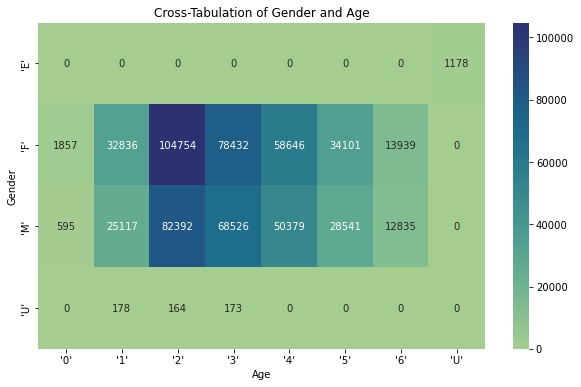

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(gender_age_crosstab, annot=True, cmap='crest', fmt='d', cbar=True)
plt.title('Cross-Tabulation of Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

# Step Analysis

# Step Feature Engineering

In [127]:
df["step"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [128]:
""""
Assuming 0 represents Midnight. 
We will utilize the cyclic nature of the day cycle to infer 'Morning','Afternoon','Evening' and 'Night'
Morning (5 am to 12 pm) = 0
Afternoon (12 pm to 5 pm) = 1
Evening (5 pm to 9 pm) = 2
Night (9 pm to 4 am) = 3

"""
def categorize_time(step):
    hour = step % 24
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 17:
        return 1
    elif 17 <= hour < 21:
        return 2
    else:
        return 3

In [129]:
TimeOfDay = df["step"].apply(categorize_time)
df = df.drop('step', axis=1)
df.insert(0, "timeOfDay", TimeOfDay)

In [130]:
df.head()

,timeOfDay,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,3,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,3,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,3,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,3,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,3,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# TimeOfDay Analysis

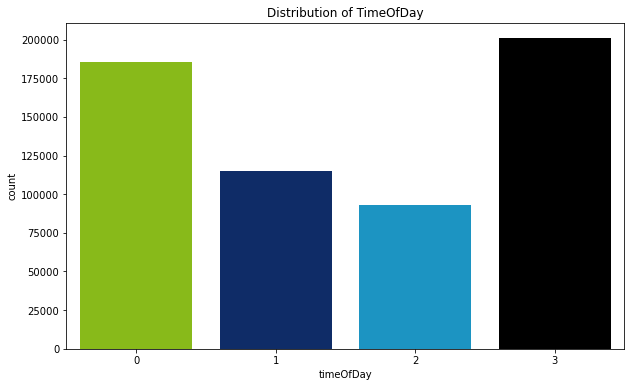

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(x='timeOfDay', data=df, palette=colors)
plt.title('Distribution of Time Of Day')
plt.show()

In [132]:
fraudulent_data = df[df['fraud'] == 1]


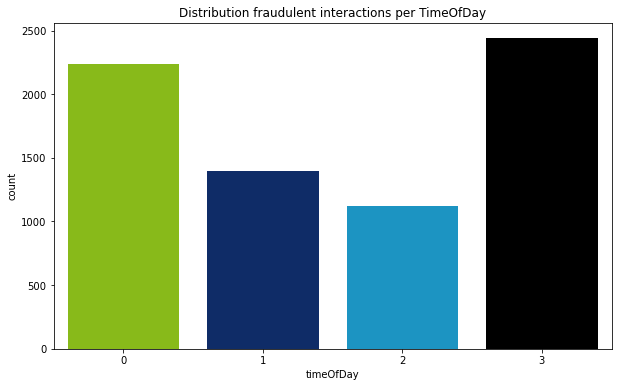

In [133]:
plt.figure(figsize=(10, 6))
sns.countplot(x='timeOfDay', data=fraudulent_data, palette=colors)
plt.title('Distribution fraudulent interactions per TimeOfDay')
plt.show()

# Consumer Analysis

In [134]:
df['customer'].nunique()

4112

In [135]:
df['merchant'].nunique()

50

In [136]:
df['category'].nunique()

15

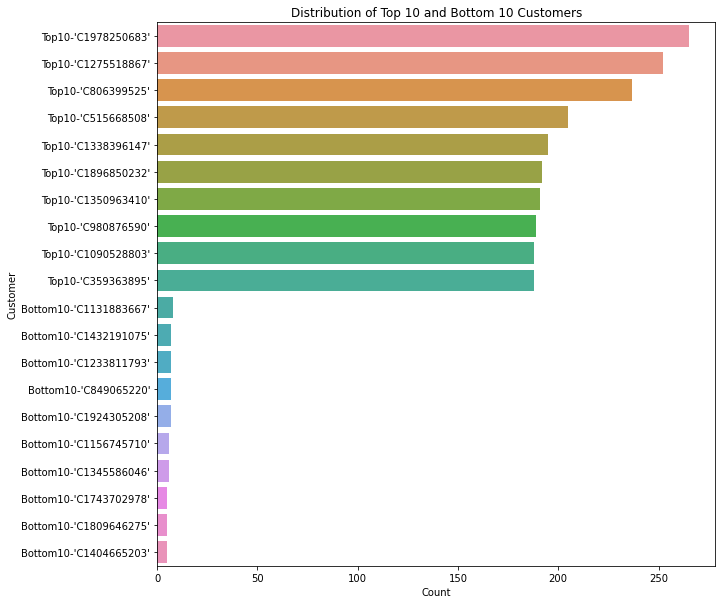

In [137]:
customer_counts = df['customer'].value_counts()
top_customers = customer_counts.head(10)
bottom_customers = customer_counts.tail(10)

top_customers_labeled = top_customers.reset_index().rename(columns={'index': 'customer', 'customer': 'count'})
bottom_customers_labeled = bottom_customers.reset_index().rename(columns={'index': 'customer', 'customer': 'count'})

top_customers_labeled['customer'] = 'Top10-' + top_customers_labeled['customer'].astype(str)
bottom_customers_labeled['customer'] = 'Bottom10-' + bottom_customers_labeled['customer'].astype(str)

selected_customers = pd.concat([top_customers_labeled, bottom_customers_labeled])

plt.figure(figsize=(10, 10))
sns.barplot(x='count', y='customer', data=selected_customers)
plt.title('Distribution of Top 10 and Bottom 10 Customers')
plt.xlabel('Count')
plt.ylabel('Customer')
plt.show()


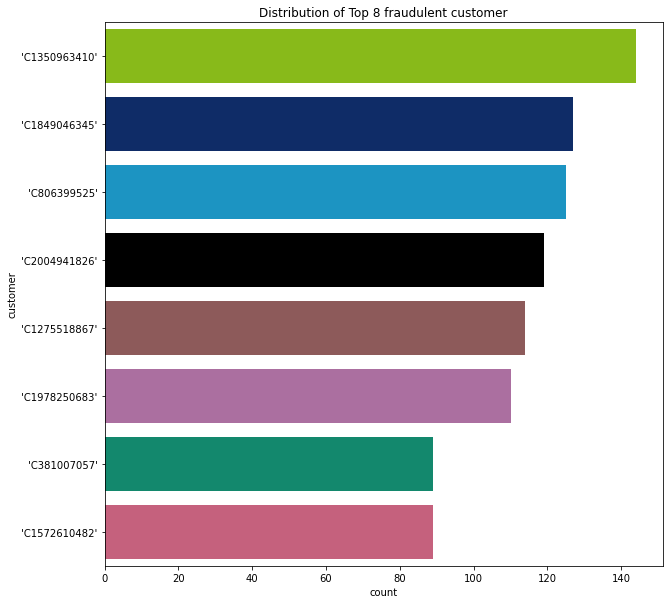

In [138]:
customer_counts = fraudulent_data['customer'].value_counts().sort_values(ascending=False)
top_customers = customer_counts.head(8)
plt.figure(figsize=(10, 10))
sns.countplot(y='customer', data=fraudulent_data, order=top_customers.index, palette=colors)
plt.title('Distribution of Top 8 fraudulent customer')
plt.show()

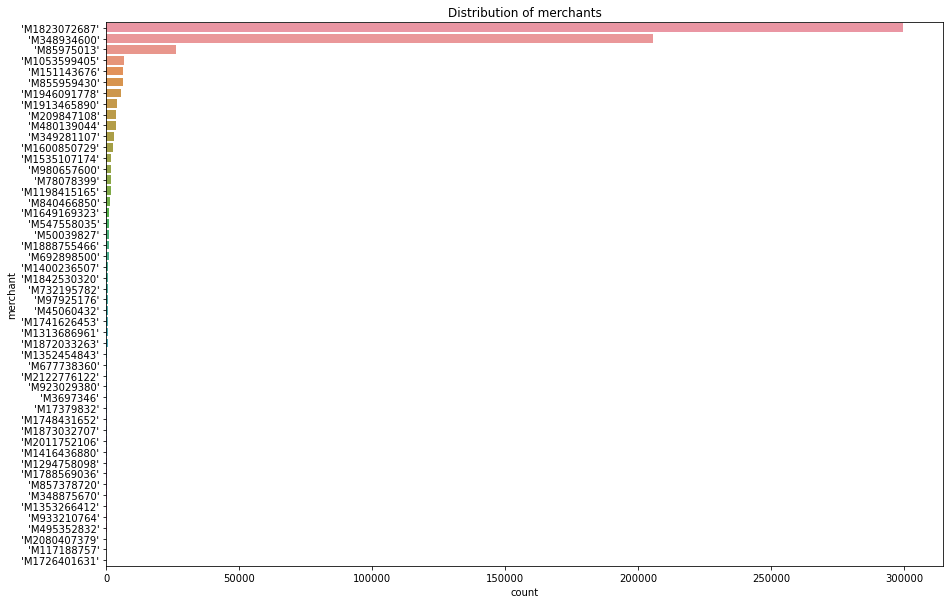

In [139]:
merchant_counts = df['merchant'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.countplot(y='merchant', data=df, order=merchant_counts.index)
plt.title('Distribution of merchants')
plt.show()

In [140]:
merchant_counts.head(2)

'M1823072687'    299693
'M348934600'     205426
Name: merchant, dtype: int64

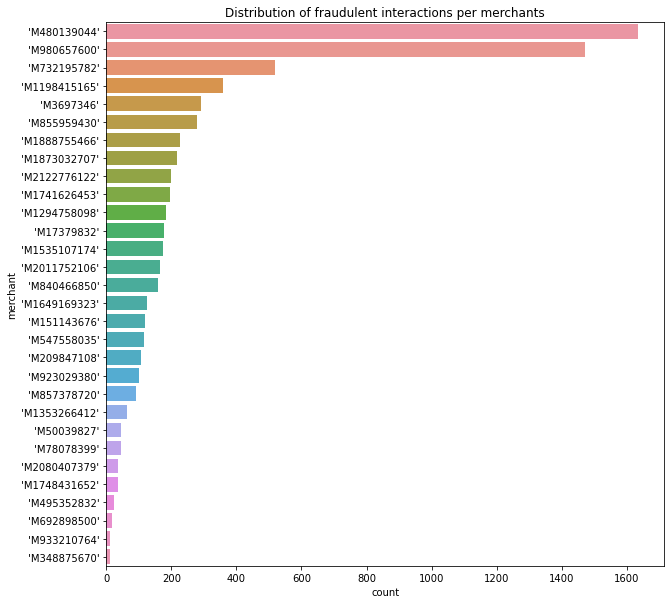

In [141]:

merchant_counts = fraudulent_data['merchant'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.countplot(y='merchant', data=fraudulent_data, order=merchant_counts.index)
plt.title('Distribution of fraudulent interactions per merchants')
plt.show()

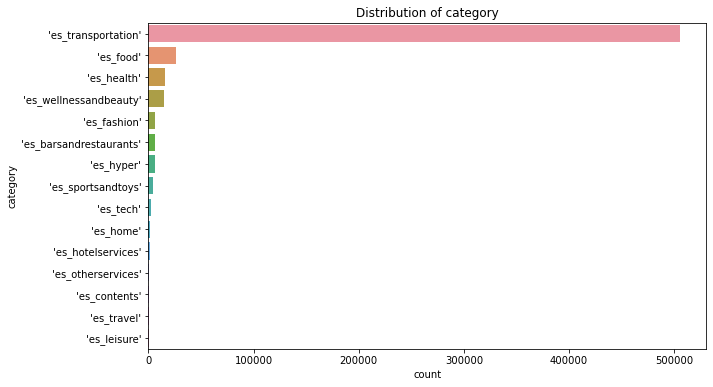

In [34]:
category_counts = df['category'].value_counts()
sorted_categories = category_counts.index
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, order=sorted_categories)
plt.title('Distribution of category')
plt.show()



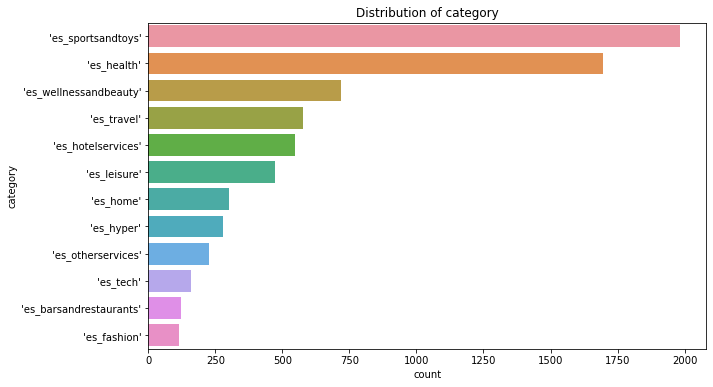

In [142]:
category_counts = fraudulent_data['category'].value_counts()
sorted_categories = category_counts.index
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=fraudulent_data, order=sorted_categories)
plt.title('Distribution of category')
plt.show()


# Location Analysis

In [143]:
df["zipcodeOri"].unique()

array(["'28007'"], dtype=object)

In [144]:
df["zipMerchant"].unique()

array(["'28007'"], dtype=object)

# Amount Analysis

In [145]:
df['amount'].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [146]:
fraudulent_data['amount'].describe()

count    7200.000000
mean      530.926551
std       835.587112
min         0.030000
25%       159.980000
50%       319.175000
75%       548.977500
max      8329.960000
Name: amount, dtype: float64

In [147]:
non_fraudulent_data = df[df['fraud'] == 0]
non_fraudulent_data['amount'].describe()

count    587443.000000
mean         31.847230
std          31.470876
min           0.000000
25%          13.590000
50%          26.610000
75%          41.895000
max        2144.860000
Name: amount, dtype: float64

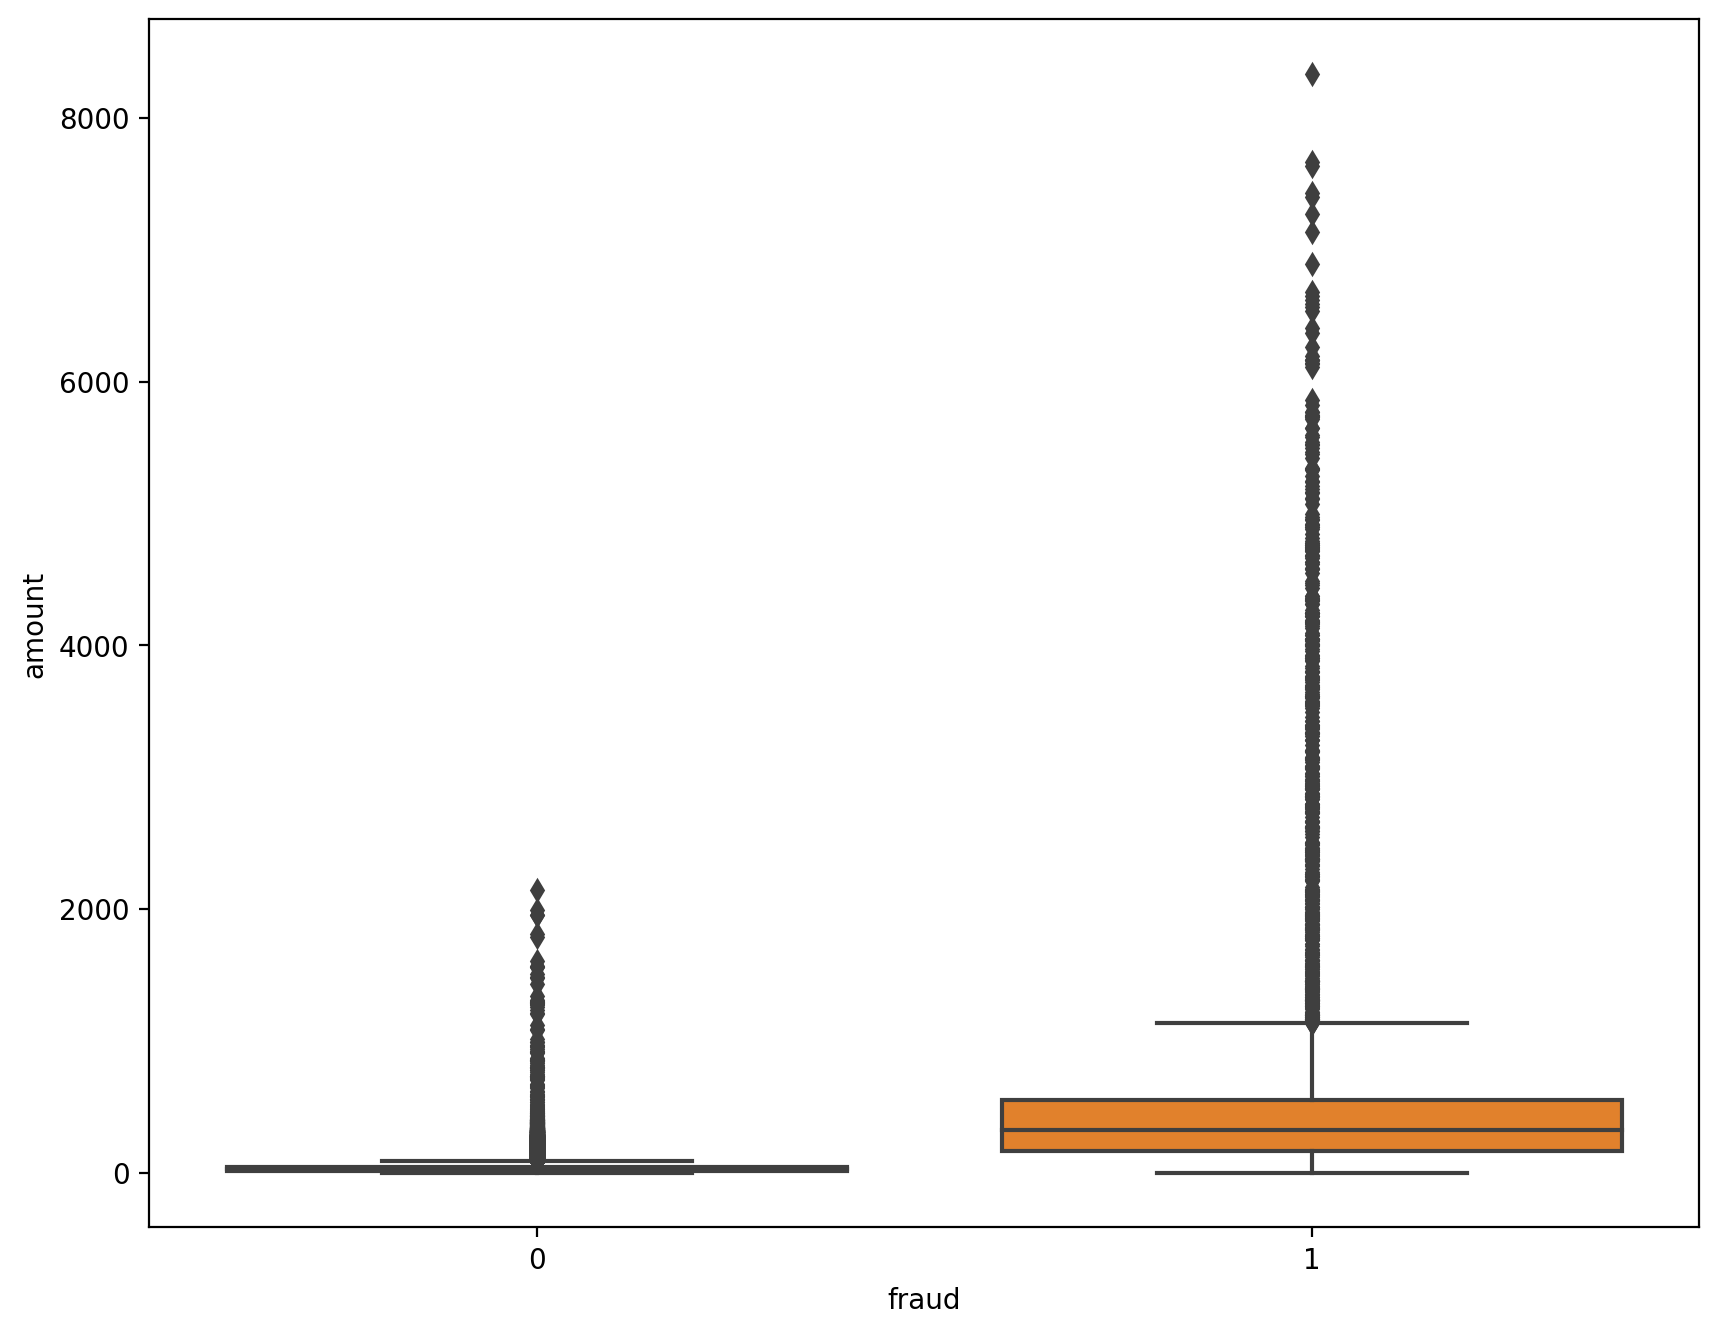

In [148]:
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df,y='amount',x='fraud')

In [149]:
# Identify outliers based on z-score threshold (z_score > 3 or z_score < -3)
df['z_score'] = zscore(df['amount'])

outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

outliers

,timeOfDay,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,z_score
853,3,'C583110837','3','M','28007','M480139044','28007','es_health',667.09,1,5.647975
854,3,'C1079254393','1','F','28007','M480139044','28007','es_health',520.50,1,4.332119
921,3,'C330615170','2','F','28007','M1535107174','28007','es_wellnessandbeauty',451.92,1,3.716514
1005,3,'C1685492470','2','F','28007','M980657600','28007','es_sportsandtoys',764.00,1,6.517882
1119,3,'C1764447156','3','F','28007','M2122776122','28007','es_home',707.22,1,6.008199
...,...,...,...,...,...,...,...,...,...,...,...
593364,0,'C475928775','4','F','28007','M480139044','28007','es_health',814.03,1,6.966973
593407,0,'C2033917877','3','M','28007','M480139044','28007','es_health',695.53,1,5.903265
593567,0,'C1193034305','4','F','28007','M2011752106','28007','es_hotelservices',491.56,1,4.072340
593987,0,'C524035200','2','M','28007','M1872033263','28007','es_home',373.36,0,3.011325


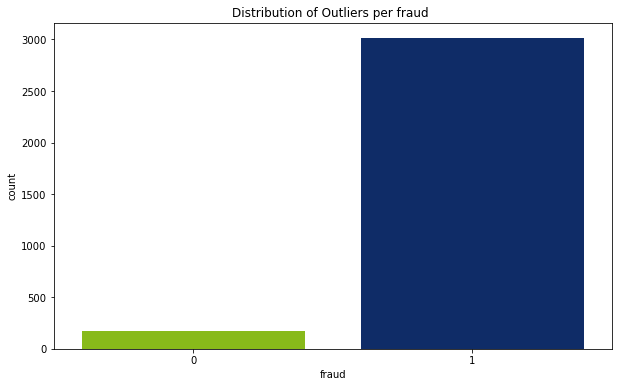

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fraud', data=outliers, palette=colors)
plt.title('Distribution of Outliers per fraud ')
plt.show()

In [151]:
df = df.drop('z_score', axis = 1)


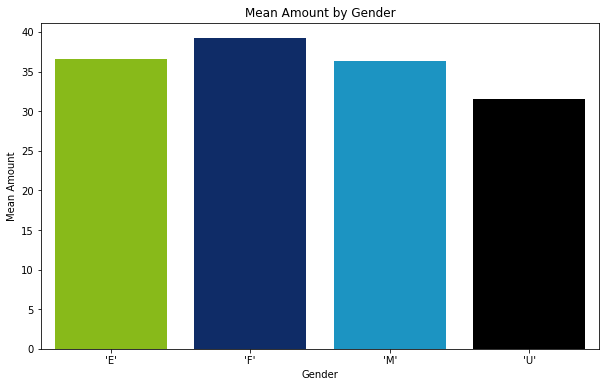

In [152]:
mean_amount_by_gender = df.groupby('gender')['amount'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_amount_by_gender.index, y=mean_amount_by_gender.values, palette=colors)
plt.title('Mean Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Amount')
plt.show()


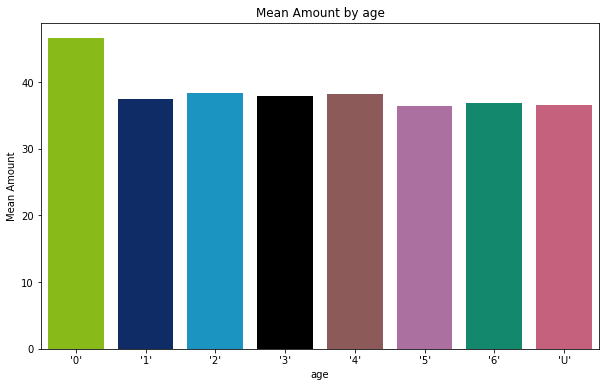

In [153]:
mean_amount_by_age = df.groupby('age')['amount'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_amount_by_age.index, y=mean_amount_by_age.values, palette=colors)
plt.title('Mean Amount by age')
plt.xlabel('age')
plt.ylabel('Mean Amount')
plt.show()


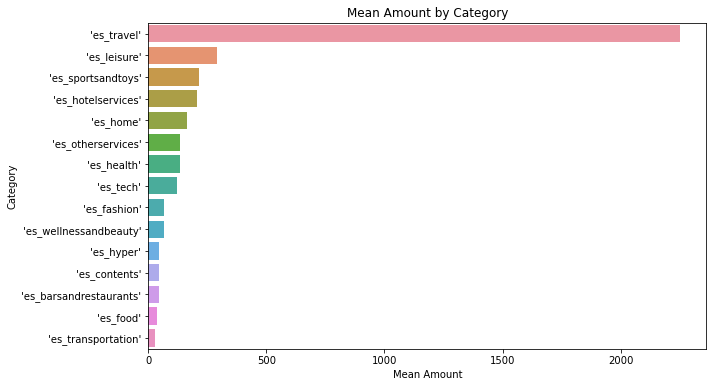

In [154]:
mean_amount_by_category = df.groupby('category')['amount'].mean()
mean_amount_by_category_sorted = mean_amount_by_category.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_amount_by_category_sorted.values, y=mean_amount_by_category_sorted.index)
plt.title('Mean Amount by Category')
plt.xlabel('Mean Amount')
plt.ylabel('Category')
plt.show()


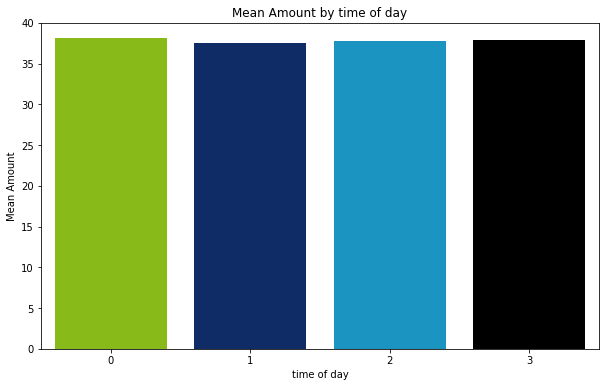

In [155]:
mean_amount_by_category = df.groupby('timeOfDay')['amount'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_amount_by_category.index, y=mean_amount_by_category.values, palette=colors)
plt.title('Mean Amount by time of day')
plt.xlabel('time of day')
plt.ylabel('Mean Amount')
plt.show()


# 2)Data Cleaning / Preprocessing

# Age data cleaning 

In [49]:
df["age"].describe()

count     594643
unique         8
top          '2'
freq      187310
Name: age, dtype: object

In [50]:
df["age"].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [51]:
df["age"] = df["age"].str.strip("'")
df["age"]

0         4
1         2
2         4
3         3
4         5
         ..
594638    3
594639    4
594640    2
594641    5
594642    4
Name: age, Length: 594643, dtype: object

In [52]:
df['age'].replace({'U': '-1'}, inplace=True)

In [53]:
df["age"].unique()

array(['4', '2', '3', '5', '1', '6', '-1', '0'], dtype=object)

In [54]:
df['age'] = df['age'].astype(int)

# Gender Data Cleaning

In [55]:
df["gender"].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [56]:
df_Gender_OneHotEncoding = pd.get_dummies(df['gender'], prefix='gender')
df_Gender_OneHotEncoding.drop("gender_'E'", axis = 1, inplace = True)
df_Gender_OneHotEncoding

,gender_'F',gender_'M',gender_'U'
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
594638,1,0,0
594639,1,0,0
594640,1,0,0
594641,0,1,0


In [57]:
df.drop("gender", axis = 1, inplace = True)
df = pd.concat([df, df_Gender_OneHotEncoding], axis=1)
df.head()

,timeOfDay,customer,age,zipcodeOri,merchant,zipMerchant,category,amount,fraud,gender_'F',gender_'M',gender_'U'
0,3,'C1093826151',4,'28007','M348934600','28007','es_transportation',4.55,0,0,1,0
1,3,'C352968107',2,'28007','M348934600','28007','es_transportation',39.68,0,0,1,0
2,3,'C2054744914',4,'28007','M1823072687','28007','es_transportation',26.89,0,1,0,0
3,3,'C1760612790',3,'28007','M348934600','28007','es_transportation',17.25,0,0,1,0
4,3,'C757503768',5,'28007','M348934600','28007','es_transportation',35.72,0,0,1,0


# Consumer Data Cleaning 

In [58]:

df["customer"].unique()

array(["'C1093826151'", "'C352968107'", "'C2054744914'", ...,
       "'C1014783484'", "'C849065220'", "'C1809646275'"], dtype=object)

In [59]:
# Too many unique value. Requries a high amount of proccessing power
df = df.drop('customer', axis = 1)

In [60]:
df["merchant"] = df["merchant"].str.strip("'")

df_Merchant_OneHotEncoding = pd.get_dummies(df['merchant'], prefix='Merchant')
df.drop("merchant", axis = 1, inplace = True)
df = pd.concat([df, df_Merchant_OneHotEncoding], axis=1)


In [61]:
df.columns

Index(['timeOfDay', 'age', 'zipcodeOri', 'zipMerchant', 'category', 'amount',
       'fraud', 'gender_'F'', 'gender_'M'', 'gender_'U'',
       'Merchant_M1053599405', 'Merchant_M117188757', 'Merchant_M1198415165',
       'Merchant_M1294758098', 'Merchant_M1313686961', 'Merchant_M1352454843',
       'Merchant_M1353266412', 'Merchant_M1400236507', 'Merchant_M1416436880',
       'Merchant_M151143676', 'Merchant_M1535107174', 'Merchant_M1600850729',
       'Merchant_M1649169323', 'Merchant_M1726401631', 'Merchant_M17379832',
       'Merchant_M1741626453', 'Merchant_M1748431652', 'Merchant_M1788569036',
       'Merchant_M1823072687', 'Merchant_M1842530320', 'Merchant_M1872033263',
       'Merchant_M1873032707', 'Merchant_M1888755466', 'Merchant_M1913465890',
       'Merchant_M1946091778', 'Merchant_M2011752106', 'Merchant_M2080407379',
       'Merchant_M209847108', 'Merchant_M2122776122', 'Merchant_M348875670',
       'Merchant_M348934600', 'Merchant_M349281107', 'Merchant_M3697346',
      

In [62]:
df["category"] = df["category"].str.strip("'")

df_category_OneHotEncoding = pd.get_dummies(df['category'], prefix='category')
df.drop("category", axis = 1, inplace = True)
df = pd.concat([df, df_category_OneHotEncoding], axis=1)

In [63]:
df.columns

Index(['timeOfDay', 'age', 'zipcodeOri', 'zipMerchant', 'amount', 'fraud',
       'gender_'F'', 'gender_'M'', 'gender_'U'', 'Merchant_M1053599405',
       'Merchant_M117188757', 'Merchant_M1198415165', 'Merchant_M1294758098',
       'Merchant_M1313686961', 'Merchant_M1352454843', 'Merchant_M1353266412',
       'Merchant_M1400236507', 'Merchant_M1416436880', 'Merchant_M151143676',
       'Merchant_M1535107174', 'Merchant_M1600850729', 'Merchant_M1649169323',
       'Merchant_M1726401631', 'Merchant_M17379832', 'Merchant_M1741626453',
       'Merchant_M1748431652', 'Merchant_M1788569036', 'Merchant_M1823072687',
       'Merchant_M1842530320', 'Merchant_M1872033263', 'Merchant_M1873032707',
       'Merchant_M1888755466', 'Merchant_M1913465890', 'Merchant_M1946091778',
       'Merchant_M2011752106', 'Merchant_M2080407379', 'Merchant_M209847108',
       'Merchant_M2122776122', 'Merchant_M348875670', 'Merchant_M348934600',
       'Merchant_M349281107', 'Merchant_M3697346', 'Merchant_M4506043

# Location Data Cleaning



In [64]:
# As there is no unique value, location is not needed in the analysis
df.drop(columns=['zipcodeOri', 'zipMerchant'], inplace=True)

# 3) Correlation

In [65]:
corr_df = df.corr()
corr_df['fraud'].sort_values().iloc[1:-1]

Merchant_M1823072687        -0.111596
Merchant_M348934600         -0.080429
gender_'M'                  -0.025172
category_es_food            -0.023793
Merchant_M85975013          -0.023793
                               ...   
category_es_travel           0.250284
Merchant_M480139044          0.319556
category_es_sportsandtoys    0.363631
Merchant_M980657600          0.409547
amount                       0.489967
Name: fraud, Length: 70, dtype: float64

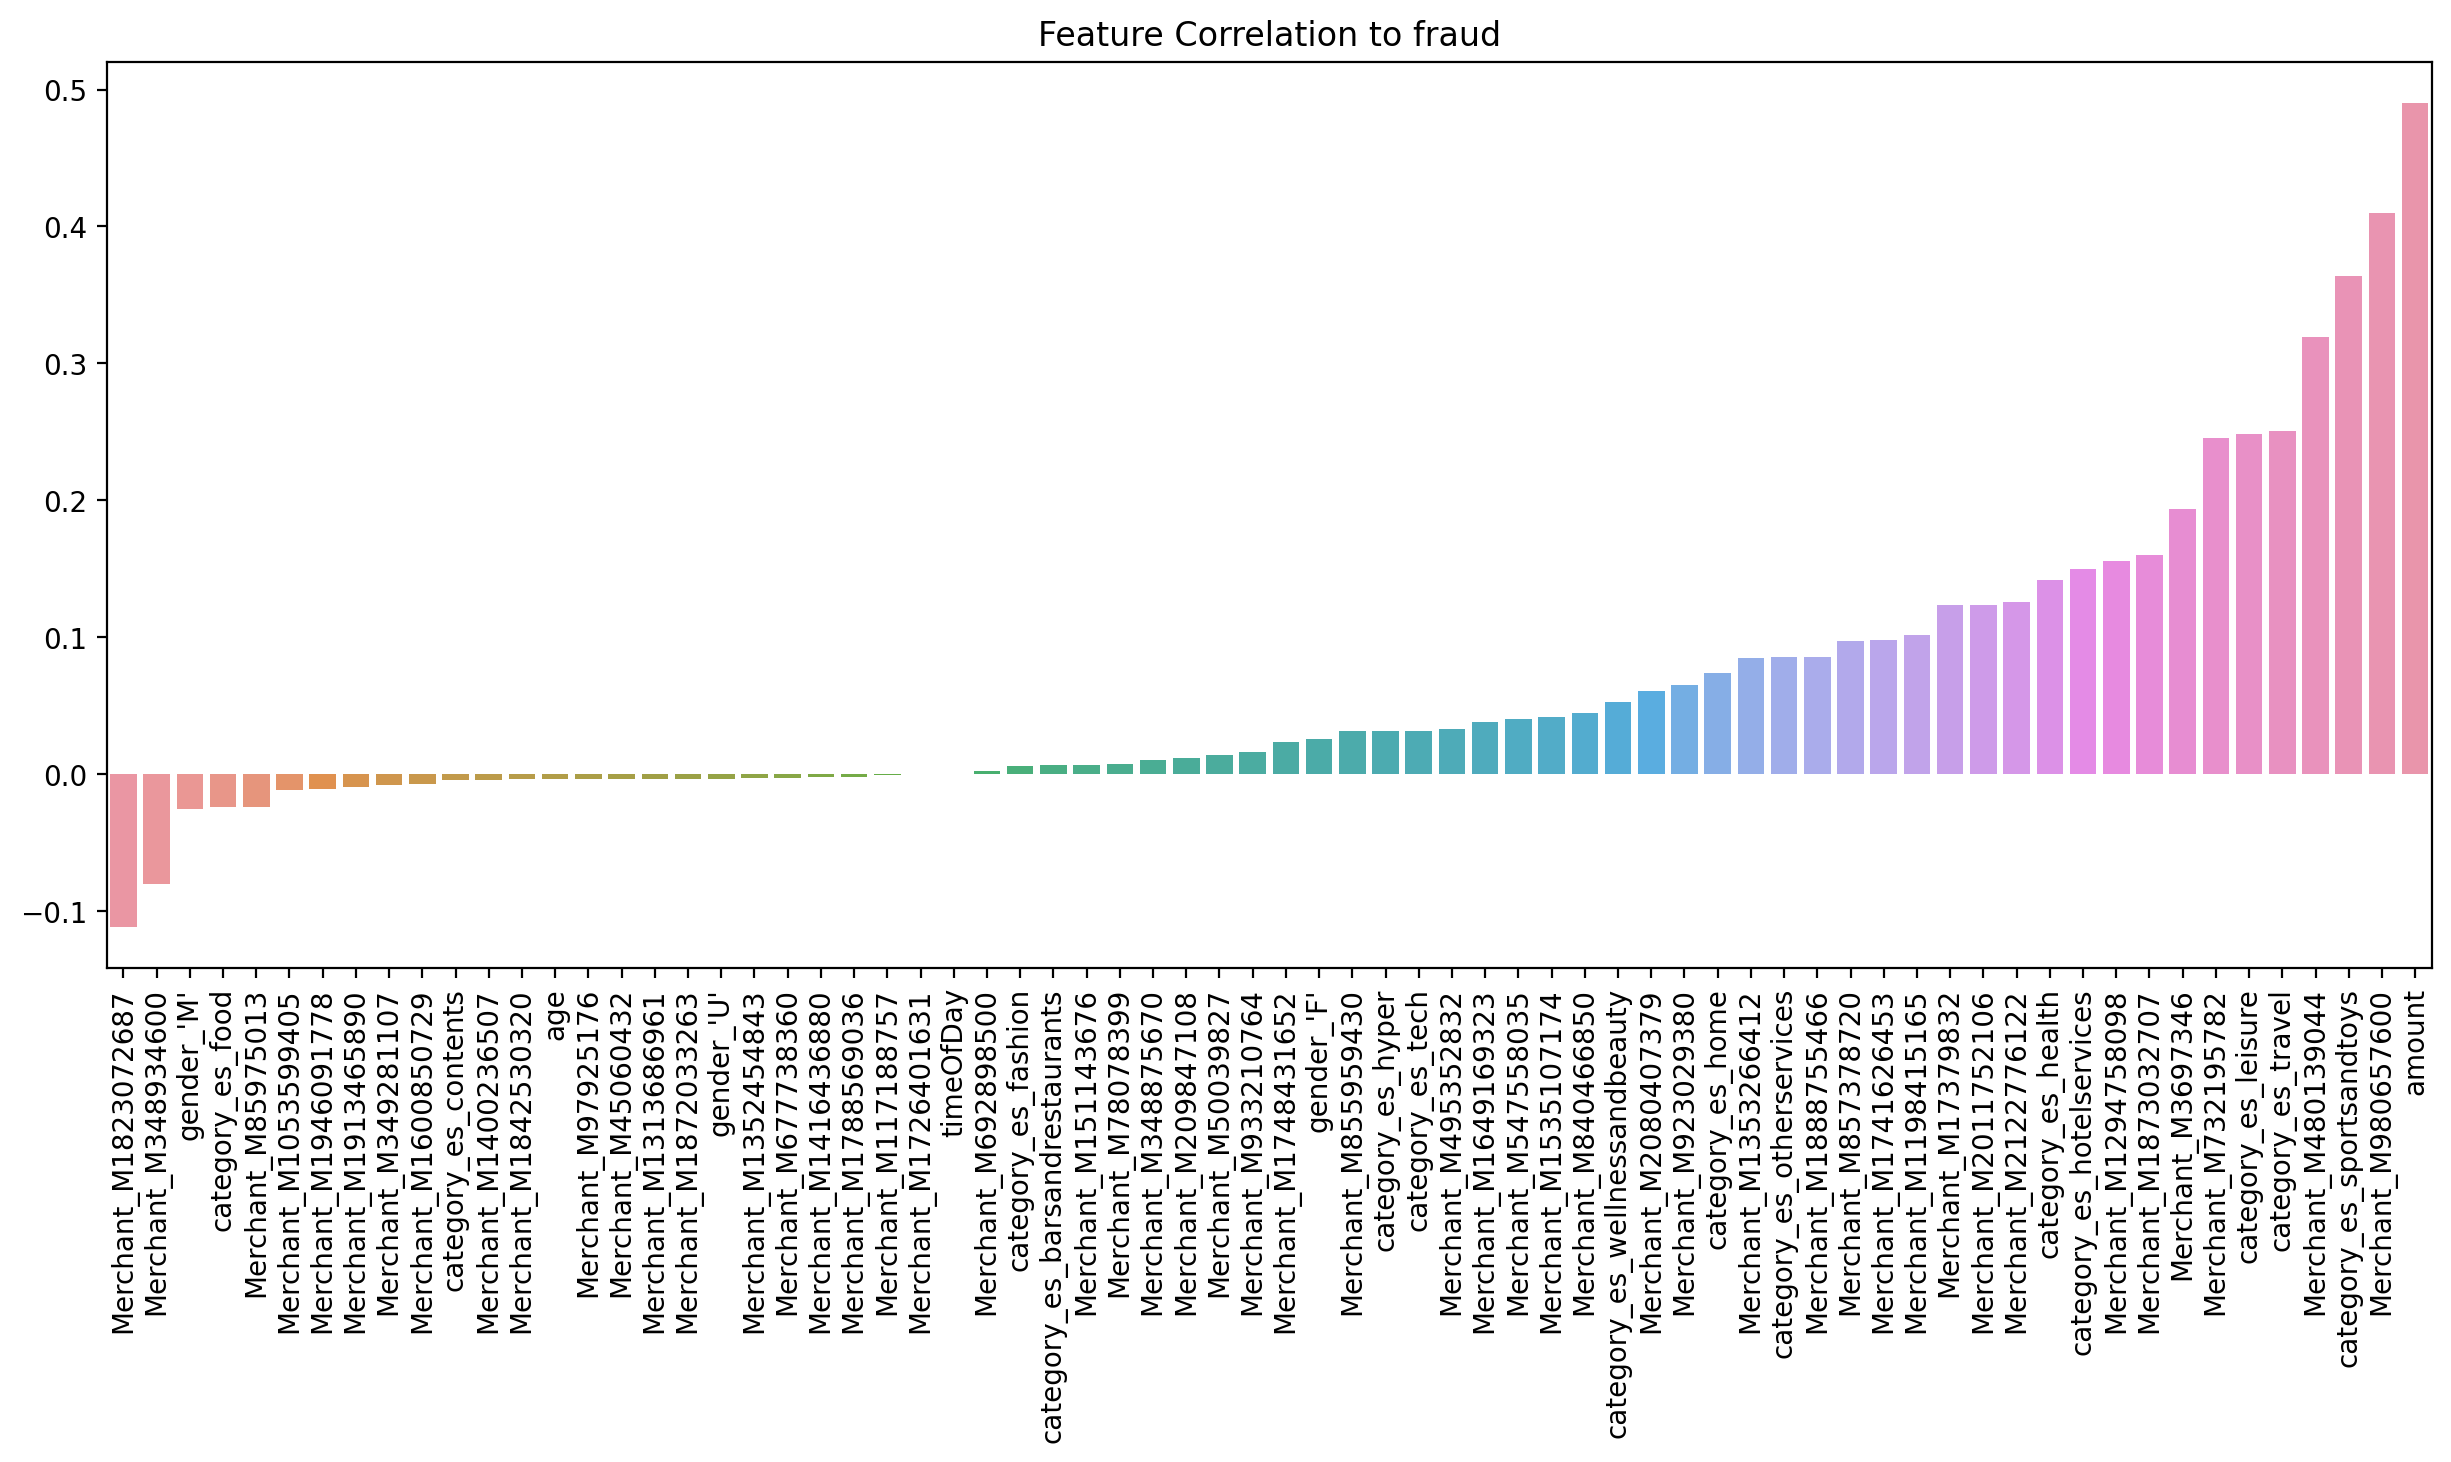

In [66]:
plt.figure(figsize=(15,6),dpi=200)
sns.barplot(x=corr_df['fraud'].sort_values().iloc[1:-1].index,y=corr_df['fraud'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to fraud")
plt.xticks(rotation=90);   

# 4) Machine learning models

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, RocCurveDisplay,confusion_matrix

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [68]:
X = df.drop('fraud', axis=1)  
y = df['fraud']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [71]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [72]:
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000, class_weight='balanced')

logreg_cv.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=1000,
                     random_state=42)

In [73]:
y_pred = logreg_cv.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117512
           1       0.58      0.90      0.71      1417

    accuracy                           0.99    118929
   macro avg       0.79      0.95      0.85    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix:
[[116598    914]
 [   137   1280]]


C:\Users\PC-LAB\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


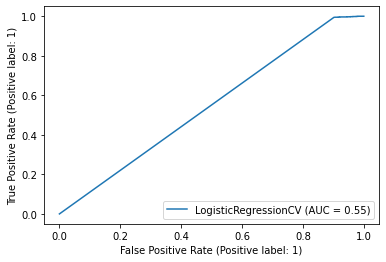

In [74]:
rfc_disp = RocCurveDisplay.from_estimator(logreg_cv, X_test, y_test)

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [77]:
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117512
           1       0.76      0.80      0.78      1417

    accuracy                           0.99    118929
   macro avg       0.88      0.90      0.89    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix:
[[117164    348]
 [   287   1130]]


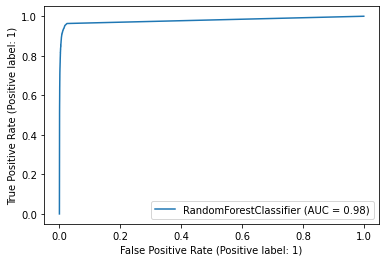

In [78]:
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [80]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_resampled_scaled, y_train_resampled)

AdaBoostClassifier()

In [81]:
y_pred = ada_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    117512
           1       0.47      0.94      0.63      1417

    accuracy                           0.99    118929
   macro avg       0.74      0.96      0.81    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix:
[[116039   1473]
 [    85   1332]]


C:\Users\PC-LAB\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


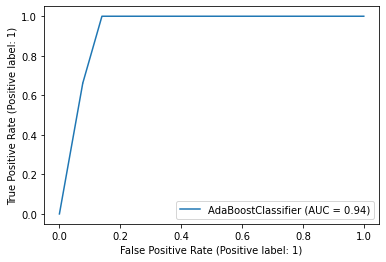

In [82]:
rfc_disp = RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

# Support vector machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [157]:
scaler_SVC = StandardScaler()
X_train_scaled_SVC = scaler.fit_transform(X_train)
X_test_scaled_SVC = scaler.transform(X_test)

In [84]:
svc = SVC(class_weight='balanced', random_state=42)
svc.fit(X_train_scaled_SVM, y_train)

SVC(class_weight='balanced', random_state=42)

In [158]:
y_pred = svc.predict(X_test_scaled_SVC)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117512
           1       0.28      0.99      0.44      1417

    accuracy                           0.97    118929
   macro avg       0.64      0.98      0.71    118929
weighted avg       0.99      0.97      0.98    118929

Confusion Matrix:
[[113953   3559]
 [    19   1398]]


C:\Users\PC-LAB\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


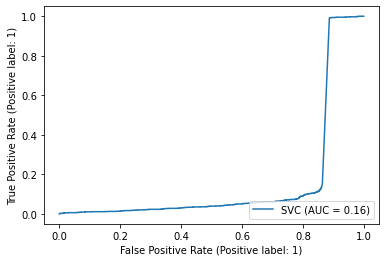

In [86]:
rfc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

# Random forest best performing - fine tuning

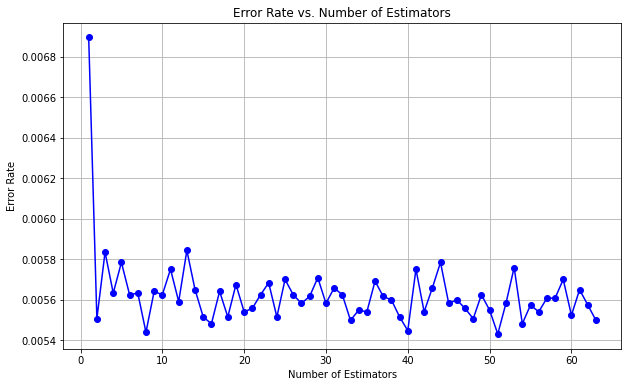

In [90]:
from sklearn.metrics import accuracy_score
    
errors = []
misclassifications = []


for n in range(1, 64):
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2)
    rfc.fit(X_train_resampled, y_train_resampled)
    preds = rfc.predict(X_test)
    

    err = 1 - accuracy_score(preds, y_test)
    n_missed = np.sum(preds != y_test)
    

    errors.append(err)
    misclassifications.append(n_missed)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 64), errors, marker='o', linestyle='-', color='b')
plt.title('Error Rate vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Best Score: 0.9970325461003302


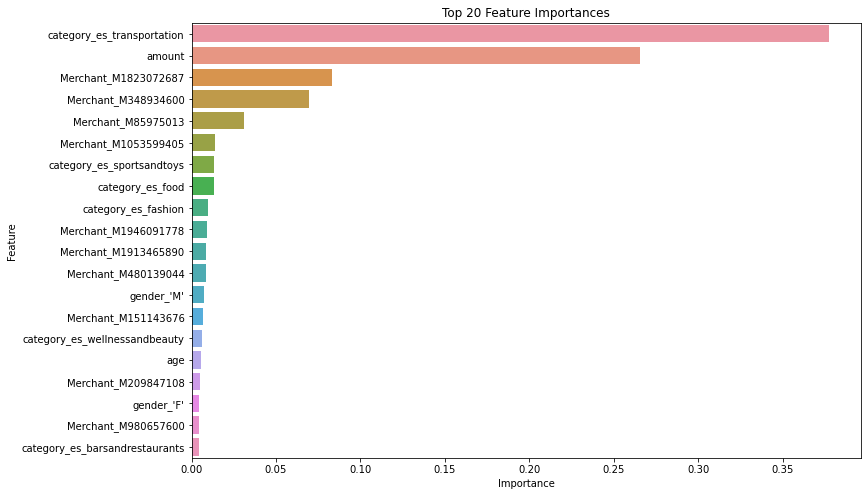

In [98]:
best_rf = grid_search.best_estimator_


feature_importances = best_rf.feature_importances_


feature_names = X_train.columns  


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))  
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [94]:
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117512
           1       0.76      0.83      0.79      1417

    accuracy                           0.99    118929
   macro avg       0.88      0.91      0.89    118929
weighted avg       1.00      0.99      0.99    118929

Confusion Matrix:
[[117137    375]
 [   245   1172]]


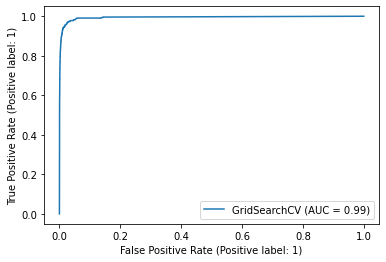

In [95]:
rfc_disp = RocCurveDisplay.from_estimator(grid_search, X_test, y_test)